<a href="https://colab.research.google.com/github/Iheena/Heena/blob/master/AI_text_detector(24th).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**setting-up tensorflow environment **

In [1]:
#cloning ttransormer garden repositotry
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 87125, done.
remote: Counting objects: 100% (879/879), done.
remote: Compressing objects: 100% (402/402), done.
remote: Total 87125 (delta 518), reused 787 (delta 469), pack-reused 86246
Receiving objects: 100% (87125/87125), 599.11 MiB | 17.49 MiB/s, done.
Resolving deltas: 100% (62392/62392), done.


In [2]:
#set the python path
import os
os.environ['PYTHONPATH'] += ":/path/to/models"

In [3]:
!pip3 install --user -r models/official/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 15.9 MB/s eta 0:00:00
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp310-cp310-linux_x86_64.whl size=44637 sha256=f946ee56e2b0e8391f8523d30b7da62b7a22bcbbf2b4dd076e270d07463c3a4f
  Stored in directory: /root/.cache/pip/wheels/0b/a9/6a/d0a6981a8dbb698845178818642f72ce179f14336908c7df01
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=8e3134fcf7cc5e3bc6bba34f8684f6fcaad6274e470e4077b04a5da2f5b5edc6
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8

**Importing necessary libraries**

In [4]:
#step 1
#importing libraries
!pip install transformers
!pip install tensorflow_text
from transformers import BertTokenizer
import re
import os
import glob
import nltk
import string
import pandas as pd

#from bert import tokenization
import tensorflow_hub as hub

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize a sentence
sentence = "I love NLP!"
tokens = tokenizer.tokenize(sentence)

print(tokens)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflo

['i', 'love', 'nl', '##p', '!']


In [5]:


!pip install tf-models-official
!pip install bert-tensorflow

#from bert import tokenization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 723.9 kB/s eta 0:00:00


**Loading Dataset**

In [6]:
#Step-2
#loading the data
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#fetching the files from google
from os import listdir
path = '/content/drive/MyDrive/Datasets'

folders = listdir(path)

# New section

In [8]:
folders

['Human_Generated', 'ChatGPT_Generated']

**Data labelling**

In [9]:
#function for reading text from the files
def read_text_data(file_path):

  str_data = ""
  with open(file_path) as inp:
    data = inp.readlines()
    str_data = data[0]

  return str_data



In [10]:
 #Data labelling
hfiles = []
hlabels = []

aifiles = []
ailabels = []
for label in folders:
  new_path = f'{path}/{label}'
  if label=='Human_Generated':
    for file in listdir(new_path):
      new_file_path = f'{path}/{label}/{file}'
      text_data = read_text_data(new_file_path)
      hfiles.append(text_data)
      hlabels.append(0)

  else :
    for file in listdir(new_path):
      new_file_path = f'{path}/{label}/{file}'
      text_data = read_text_data(new_file_path)
      aifiles.append(text_data)
      ailabels.append(1)

print('huma',len(hfiles))
print('ai',len(aifiles))




huma 3243
ai 400


In [11]:
#merging the files with labels
import pandas as pd
labeled_data_human = pd.DataFrame({'Files':hfiles,'Labels':hlabels})
labeled_data_AI = pd.DataFrame({'Files':aifiles,'Labels':ailabels})

In [12]:
labeled_data_AI.tail(10)

,Files,Labels
390,"""Arrival"" is a thought-provoking sci-fi drama ...",1
391,"""No Country for Old Men"" is a gripping neo-Wes...",1
392,"""The Grand Budapest Hotel"" is a whimsical come...",1
393,"""La La Land"" is a romantic musical directed by...",1
394,"""The Big Lebowski"" is a cult classic comedy fi...",1
395,"""Fight Club"" is a provocative drama directed b...",1
396,"""Schindler's List"" is a powerful historical dr...",1
397,"""Spirited Away"" is a breathtaking masterpiece ...",1
398,"""Toy Story"" is a groundbreaking animated film ...",1
399,"""Black Panther"" is a groundbreaking superhero ...",1


**Data Pre-processing**

In [13]:
#Data pre-processing
#Removing punctuations
import string
string.punctuation

def remove_punctuation(txt):
  txt_nopunct="".join([c for c in txt if c not in string.punctuation])
  return txt_nopunct





In [14]:
labeled_data_human['Files_new']=labeled_data_human['Files'].apply(lambda x: remove_punctuation(x))
labeled_data_human.tail()
labeled_data_AI['Files_new']=labeled_data_AI['Files'].apply(lambda x: remove_punctuation(x))
labeled_data_AI.tail()


,Files,Labels,Files_new
395,"""Fight Club"" is a provocative drama directed b...",1,Fight Club is a provocative drama directed by ...
396,"""Schindler's List"" is a powerful historical dr...",1,Schindlers List is a powerful historical drama...
397,"""Spirited Away"" is a breathtaking masterpiece ...",1,Spirited Away is a breathtaking masterpiece th...
398,"""Toy Story"" is a groundbreaking animated film ...",1,Toy Story is a groundbreaking animated film di...
399,"""Black Panther"" is a groundbreaking superhero ...",1,Black Panther is a groundbreaking superhero fi...


In [15]:
#removing unwanted words
labeled_data_human['Files_new']=labeled_data_human['Files_new'].str.replace(r"<br /><br />",'')
labeled_data_human.head()

labeled_data_AI['Files_new']=labeled_data_AI['Files_new'].str.replace(r"<br /><br />",'')
labeled_data_AI.head()

,Files,Labels,Files_new
0,"""Titanic"" is an iconic masterpiece that has ca...",1,Titanic is an iconic masterpiece that has capt...
1,The Harry Potter movie franchise is a spellbin...,1,The Harry Potter movie franchise is a spellbin...
2,The Harry Potter movies are a beloved franchis...,1,The Harry Potter movies are a beloved franchis...
3,\n,1,\n
4,This movie will leave you questioning reality ...,1,This movie will leave you questioning reality ...


In [16]:
labeled_data_human.shape

(3243, 3)

In [17]:
#Independent features
#X=list(labeled_data['Files_new'])
#X = np.array(X)
#len(y)
labeled_data_AI.shape

(400, 3)

In [ ]:
#y=list(labeled_data['Labels'])

In [18]:
#!pip install --upgrade --force-reinstall tensorflow-gpu
#!export CUDA_VISIBLE_DEVICES=0,1
!pip install tensorflow-text



In [19]:

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import sys
sys.path.append('models')

#!apt-get -qq install -y sentencepiece && pip install -U sentencepiece
#from official.nlp.data import classifier_data_lib


In [20]:
!pip install --upgrade pip
!pip install sentencepiece
!pip uninstall sentencepiece
!pip install sentencepiece
#import sentencepiece as spm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Found existing installation: sentencepiece 0.1.99
Uninstalling sentencepiece-0.1.99:
  Would remove:
    /root/.local/lib/python3.10/site-packages/sentencepiece-0.1.99.dist-info/*
    /root/.local/lib/python3.10/site-packages/sentencepiece/*
Proceed (Y/n)? Y
  Successfully uninstalled sentencepiece-0.1.99
  Using cached sentencepiece-0.1.99-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)


In [21]:
from official.nlp.data import classifier_data_lib


In [22]:
#step 4
from sklearn.model_selection import train_test_split
#Human_generated
train_hdf,remaining=train_test_split(labeled_data_human,random_state=42,train_size=0.70)#experiment 2(22/05/23) change in data split
valid_hdf,test_hdf = train_test_split(remaining, test_size=0.33, random_state=42)
train_hdf.shape,valid_hdf.shape,test_hdf.shape

((2270, 3), (651, 3), (322, 3))

In [23]:
##AI_generated
train_adf,remaining=train_test_split(labeled_data_AI,random_state=42,train_size=0.70)#stratify-70%train data
valid_adf,test_adf = train_test_split(remaining, test_size=0.33, random_state=42)#20% validatae data and 10% test data
train_adf.shape,valid_adf.shape,test_adf.shape


((280, 3), (80, 3), (40, 3))

In [24]:
##import pandas as pd
test_df=pd.concat([test_hdf,test_adf],axis=0)
valid_df=pd.concat([valid_hdf,valid_adf],axis=0)
train_df=pd.concat([train_hdf,train_adf],axis=0)
train_df.shape,valid_df.shape,test_df.shape
train_class_counts = train_df['Labels'].value_counts()
valid_class_counts = valid_df['Labels'].value_counts()
test_class_counts = test_df['Labels'].value_counts()
print('train:',train_class_counts)
print('valid:',valid_class_counts)

test_df.shape,train_df.shape,valid_df.shape

train: 0    2270
1     280
Name: Labels, dtype: int64
valid: 0    651
1     80
Name: Labels, dtype: int64


((362, 3), (2550, 3), (731, 3))

In [25]:
test_df['Labels'].value_counts()

0    322
1     40
Name: Labels, dtype: int64

In [26]:
#import tensorflow as tf

with tf.device('/cpu:0'):#processing on CPU to avoid overhead in GPU
  train_data=tf.data.Dataset.from_tensor_slices((train_df['Files_new'].values,train_df['Labels'].values))
  valid_data=tf.data.Dataset.from_tensor_slices((valid_df.Files_new.values,valid_df.Labels.values))
  test_data=tf.data.Dataset.from_tensor_slices((test_df.Files_new.values,test_df.Labels.values))

  for text,label in test_data.take(1):
    print(text)
    print(label)


tf.Tensor(b'This tale of the upperclasses getting their comeuppance and wallowing in their highclass misery is like a contemporary MidSommerish version of an old Joan Crawford movie in which she suffered in mink Here people behave in a frightfully civilized manner in the face of adversity A wellheeled London solicitor Tom Wilkinson discovers that not only is his wife having an affair with the local gentry but that she has also killed their housekeepers husband in a hitandrun accident He throws up but otherwise his stiffupperlip hardly quaversbr br Written and directed by Julian Fellowes who won an Oscar for writing Gosford Park this is his directorial debut from a novel by Nigel Balchin its quite comical although I am not sure how much of the comedy is intended Its like a throwback to British films of the forties where characters all behaved like characters in books or plays rather than like people might in real life However its not all bad Wilkinson is terrific even if you never belie

In [27]:
size = test_data.cardinality().numpy()
print("Size of test_data:", size)


Size of test_data: 362


**BERT Tokenization**

In [28]:
#Step5

from bert import tokenization
label_list=[0,1] #label category  1 for AI genertaed 0 for Human written
max_seq_length=128 #maximum length of input sequences
train_batch_size=32

#get BERT layer
bert_layer=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",trainable=True)
vocab_file=bert_layer.resolved_object.vocab_file.asset_path.numpy()#converting tensor into numpy
do_lower_case=bert_layer.resolved_object.do_lower_case.numpy()#uncashed version
Tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case)




In [29]:
#Tokenization example
Tokenizer.wordpiece_tokenizer.tokenize('hi,how are you?')

['hi', '##,', '##how', 'are', 'you', '##?']

**Features extraction**

In [30]:
#step 6
#Tokenize and preprocess Text for BERT
#function to convert row to input features and label
def to_feature(text,label,label_list=label_list,max_seq_length=max_seq_length,tokenizer=Tokenizer):
  example=classifier_data_lib.InputExample(guid=None,text_a=text.numpy(),text_b=None,label=label.numpy())
  feature=classifier_data_lib.convert_single_example(0,example,label_list,max_seq_length,tokenizer)
  return(feature.input_ids,feature.input_mask,feature.segment_ids,feature.label_id)


In [31]:
#step 7
#wrap a function into tensorflow op for eager execution

def to_feature_map(text,label):
  input_ids,input_mask,segment_ids,label_id=tf.py_function(to_feature,inp=[text,label],Tout=[tf.int32,tf.int32,tf.int32,tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x={
      'input_word_ids':input_ids,
      'input_mask':input_mask,
      'input_type_ids':segment_ids
  }

  return(x,label_id)
train_data


<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

**Input Pipeline**

In [32]:
#Step 8
#create input pipeline with tf.data
with tf.device('/cpu:0'):
  #train
  train_data=(train_data.map(to_feature_map,
                            num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32,drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))

  #valid
  valid_data=(valid_data.map(to_feature_map,
                             num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .batch(32,drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))

  #test
  test_data=(test_data.map(to_feature_map,
                            num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32,drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))





In [33]:
#train data specification
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [34]:
#valid data specification
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

**Model building**

In [35]:
#step 9
#add a classification head to BERT layer

#building the model
def create_model():
  input_word_ids=tf.keras.layers.Input(shape=(max_seq_length,),dtype=tf.int32,name="input_word_ids")
  input_mask=tf.keras.layers.Input(shape=(max_seq_length,),dtype=tf.int32,name='input_mask')
  input_type_ids=tf.keras.layers.Input(shape=(max_seq_length,),dtype=tf.int32,name='input_type_ids')

  pooled_output,sequences_output=bert_layer([input_word_ids,input_mask,input_type_ids])

  drop=tf.keras.layers.Dropout(0.4)(pooled_output)
  output=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(drop)

  model=tf.keras.Model(
      inputs={
          'input_word_ids':input_word_ids,
          'input_mask':input_mask,
          'input_type_ids':input_type_ids
      },
      outputs=output
  )

  return model



**fine-tuning for AI text detection**

In [36]:
#step 10
#Fine-tune BERT for text classification
import tensorflow as tf
from keras.optimizers import Adam
model=create_model()
model.compile(optimizer=Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryFocalCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 128)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                              

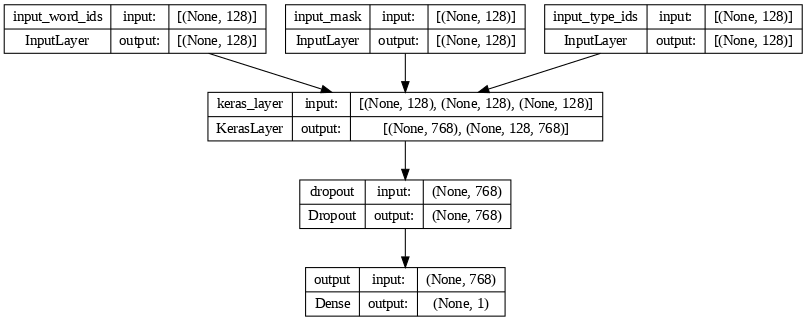

In [37]:
tf.keras.utils.plot_model(model=model,show_shapes=True,dpi=76)

**Model Training**

In [38]:
#!pip install tensorflow-text tensorflow-addons tensorflow-datasets
#!pip install sentencepiece
#from official.nlp.data import classifier_data_lib


import absl.flags
absl.flags.FLAGS(["dummy"]) # Parse flags


epochs = 3
history = model.fit(train_data, validation_data=valid_data, epochs=epochs, verbose=1)

filePath = '/content/drive/MyDrive/my_model_epoch3.hdf5'
model.save(filePath)



Epoch 1/3
79/79 [==============================] - 134s 987ms/step - loss: 0.0624 - binary_accuracy: 0.9359 - val_loss: 0.0247 - val_binary_accuracy: 0.9645
Epoch 2/3
79/79 [==============================] - 87s 998ms/step - loss: 0.0114 - binary_accuracy: 0.9913 - val_loss: 0.0119 - val_binary_accuracy: 0.9886
Epoch 3/3
79/79 [==============================] - 79s 952ms/step - loss: 0.0059 - binary_accuracy: 0.9929 - val_loss: 0.0024 - val_binary_accuracy: 0.9943


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#loading the model for further processing
#model.load(filePath)
#epochs = 3
#history = model.fit(train_data, validation_data=test_data, epochs=epochs, verbose=1)

# Access the test accuracy from the history object
# train_accuracy = history.history['val_binary_accuracy']

# print("Train Accuracy:", train_accuracy)


In [39]:
#Task 11
#evaluate the BERT Text classification
import matplotlib.pyplot as plt
#print("plot")

def plot_graphs(history,metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric,'val_'+metric])
  plt.show()

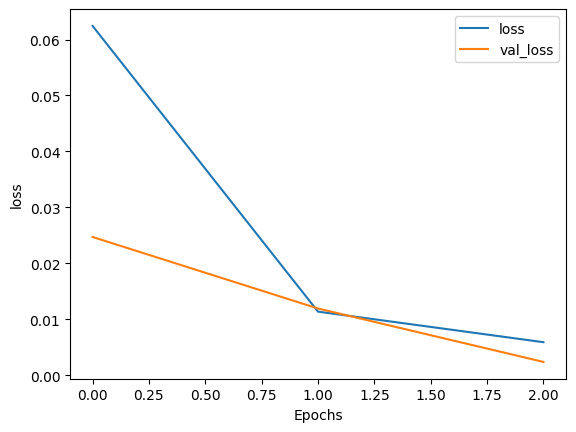

In [40]:
plot_graphs(history,'loss')

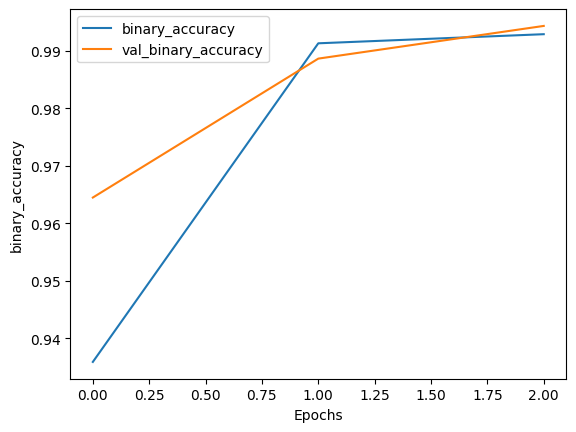

In [41]:
plot_graphs(history,'binary_accuracy')

In [42]:
#evaluation
# #Tokenize and preprocess Text for BERT
# #function to convert row to input features and label
def to_feature(text,label,label_list=label_list,max_seq_length=max_seq_length,tokenizer=Tokenizer):
  example=classifier_data_lib.InputExample(guid=None,text_a=text.numpy(),text_b=None,label=label.numpy())
  feature=classifier_data_lib.convert_single_example(0,example,label_list,max_seq_length,tokenizer)
  return(feature.input_ids,feature.input_mask,feature.segment_ids,feature.label_id)
# step 7
# #wrap a function into tensorflow op for eager execution

def to_feature_map(text,label):
  input_ids,input_mask,segment_ids,label_id=tf.py_function(to_feature,inp=[text,label],Tout=[tf.int32,tf.int32,tf.int32,tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x={
      'input_word_ids':input_ids,
      'input_mask':input_mask,
      'input_type_ids':segment_ids
  }

  return(x,label_id)

import tensorflow as tf

# sample_example=['"Eternal Sunshine of the Spotless Mind" - This movie is a beautiful and unconventional love story. Jim Carrey and Kate Winslets performances are heartfelt and the storys themes of memory and love are thought-provoking.']
# test_data=tf.data.Dataset.from_tensor_slices((sample_example,[0]*len(sample_example)))
# test_data=(test_data.map(to_feature_map).batch(1))
preds=model.predict(test_data)
threshold=0.8
['AI generated' if pred>=threshold else 'Human-generated' for pred in preds]









11/11 [==============================] - 5s 293ms/step


['Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'AI generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'AI generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'Human-generated',
 'AI generated',
 'Human-generated',
 'Human-generated',
 'AI generated',
 'Human-generated',
 'Human-generated',
 'AI generat

In [ ]:
# def plot_history(history):
#   fig,axs=plt.subplots(2)

#   #Accuracy sub plot
#   axs[0].plot(history.history["binary_accuracy"],label="train accuracy")
#   axs[0].plot(history.history["val_binary_accuracy"],label="test accuracy")
#   axs[0].set_ylabel("Accuracy")
#   axs[0].legend(loc="lower right")
#   axs[0].set_title("Accuracy eval")




#   #Loss subplot
#   axs[1].plot(history.history["loss"],label="train error")
#   axs[1].plot(history.history["val_loss"],label="test error")
#   axs[1].set_ylabel("error")
#   axs[1].set_ylabel("epoch")
#   axs[1].legend(loc="upper right")
#   axs[1].set_title("error eval")

#   plt.show()


In [ ]:
#plot_history(history)

**evalution Matrix**

In [43]:
#Evaluation
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
#from sklearn.metrics import confusion_matrix


In [44]:
#accuracy
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

In [45]:
true_labels = test_df.Labels

true_labels

840     0
1042    0
1729    0
2389    0
3230    0
       ..
131     1
395     1
70      1
305     1
126     1
Name: Labels, Length: 362, dtype: int64

In [46]:
len(test_data)

11

In [47]:
true_labels = test_df.Labels
predictions = model.predict(test_data)
predicted_labels = predictions.argmax(axis=-1)

print("test data len",true_labels.shape)
print("predictdata_len",predicted_labels.shape)

11/11 [==============================] - 5s 290ms/step
test data len (362,)
predictdata_len (352,)


In [48]:
# Load the test data
#test_df = pd.read_csv('test_data.csv')

# Preprocess the test data
# import pandas as pd
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from transformers import BertTokenizer, TFBertForSequenceClassification

# Load the BERT model and tokenizer
#model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# test_inputs = tokenizer(list(test_df['Files_new']), padding=True, truncation=True, return_tensors='tf')
# test_labels = list(test_df['Labels'])
# Extract input tensors from test_inputs
# input_ids = test_input[0]
# token_type_ids = test_input[1]
# attention_mask = test_input[2]

# # Make predictions on the test data
# test_preds = model.predict([input_ids, token_type_ids, attention_mask])[0].argmax(axis=-1)

#true_labels = test_data[:, -1]
true_labels = test_df.Labels
predictions = model.predict(test_data)
#predictions = predictions[:len(true_labels)].argmax(axis=-1)

predicted_labels = predictions.argmax(axis=-1)
true_labels = true_labels[:len(predicted_labels)]


precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Calculating mean squared error
#mse = mean_squared_error(true_labels, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
#print("Mean Squared Error:", mse)


11/11 [==============================] - 5s 291ms/step
Precision: 0.8368091425619835
Recall: 0.9147727272727273
F1-score: 0.8740558403021311


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
